In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.animation as animation
from IPython.display import HTML  # for embedded matplotlib animation
from math import *
import random
import seaborn as sns

matplotlib.rc('animation', html='html5')

In [ ]:
global NEUTRAL, INFLUENCED
NEUTRAL = 0 #Not influenced
INFLUENCED = 1

In [ ]:
def initBar(m, n, hotSites):
#   global AMBIENT
    ambientBar = NEUTRAL * np.ones((m, n))
    bar = applyHotCold(ambientBar, hotSites)
    return bar

In [ ]:
def applyHotCold(bar, rightSites): #applies influenced to the population
    for k in range(len(rightSites)):
        bar[rightSites[k, 0], rightSites[k, 1]] = INFLUENCED
    return bar

In [ ]:
def reflectingLat(lat):
    latNS = np.row_stack((lat[0], lat, lat[-1]))
    return np.column_stack((latNS[:,0], latNS, latNS[:,-1]))

In [ ]:
def periodicLat(lat): #This is the function of the boundary conditions.
    latN = np.row_stack((lat[-1], lat))
    latS = np.row_stack((latN, lat[0]))
    latE = np.column_stack((latS[:,-1], latS))
    return np.column_stack((latE, latS[:,0]))

In [ ]:
def applyDiffusionExtended(latExt, P):
    m = latExt.shape[0] - 2
    n = latExt.shape[1] - 2
    # newLat = latExt[0,m
    newLat = np.zeros((m, n))

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            site = latExt[i, j]
            N = latExt[i - 1, j]
            NE = latExt[i - 1, j + 1]
            E = latExt[i, j + 1]
            SE = latExt[i + 1, j + 1]
            S = latExt[i + 1, j]
            SW = latExt[i + 1, j - 1]
            W = latExt[i, j - 1]
            NW = latExt[i - 1, j - 1]
            newLat[i - 1, j - 1] = interaction(site, N, NE, E, SE, S, SW, W, NW, p = P);
    return newLat

In [ ]:
def prob_get_infection(k, P):
  return 1 - (1-P)**k

In [ ]:
def interaction(site, N, NE, E, SE, S, SW, W, NW, p=0.125):
    peer = N + NE + E + SE + S + SW + W + NW
    if (site == 0 and peer > 0 and np.random.rand() < prob_get_infection(peer, p)):
      return 1
    else :
      return site

In [ ]:
def  interactionSim(m, n, hotSites, t, boundary, P):
    # Initialize grid
    bar = initBar(m, n, hotSites)
    change = np.array([])
    # Perform simulation
    grids = np.zeros((t + 1, m, n))
    grids[0, :, :] = bar
    for i in range(1, t + 1):
        # Extend matrix
        barExtended = boundary(bar)

        # Apply spread of heat function to each grid point
        bar = applyDiffusionExtended(barExtended, P)
        # reapply hot and cold spots

        # Save new matrix
        grids[i, :, :] = bar
        change = np.append(change, np.sum(grids[i, :, :]) - np.sum(grids[i - 1, :, :]))
    return grids, change

In [ ]:
def animate_simulation(grids, time):
  Writer = animation.writers['ffmpeg']
  writer = Writer(fps=60, metadata=dict(artist='Me'), bitrate=1800)

  figGray = plt.figure()
  plt.axis('off')
  imGray = plt.imshow(grids[0,:,:], cmap='gray', interpolation='nearest', animated=True)

  # The animation function, called to produce a frame for each generation.
  def updatefig(i, *args):
      global grids
      imGray.set_array(grids[i,:,:])
      return imGray,

  grid_ani = animation.FuncAnimation(figGray, updatefig, save_count = len(grids),
                                    interval=50, blit=False)
  plt.show()

  # To save the animation, use the command, placed before HTML:
  grid_ani.save('DiffusionGray.mp4', writer=writer)

  return HTML(grid_ani.to_html5_video())

In [ ]:
def generate_random_matrix(n, p_range, q_range):
    # Generate random integers for each column
    column1 = np.random.randint(0, p_range, size=n)
    column2 = np.random.randint(0, q_range, size=n)

    # Combine columns into a matrix
    result_matrix = np.column_stack((column1, column2))

    return result_matrix

In [ ]:
print(generate_random_matrix(5, 10, 30) )

[[ 6 19]
 [ 0  6]
 [ 0  8]
 [ 5 21]
 [ 1  4]]


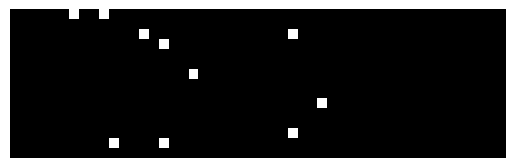

In [ ]:
m = 15
n = 50
t = 50
# influenced = np.array([[2, 4], [2, 5], [4, 4], [7, 10], [4, 10], [9, 25]])
influenced = generate_random_matrix(10, m, n)
grids, change = interactionSim(m, n, influenced, t, reflectingLat, 0.125)

animate_simulation(grids, t)

Using periodic boundary condition

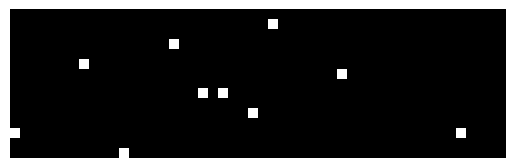

In [ ]:
m = 15
n = 50
t = 50
# influenced = np.array([[2, 4], [2, 5], [4, 4], [7, 10], [4, 10], [9, 25]])
influenced = generate_random_matrix(10, m, n)
grids, change = interactionSim(m, n, influenced, t, periodicLat, 0.125)

animate_simulation(grids, t)

In [ ]:
m = 100
n = 100

t = 100
numiter = 50

change_array = np.zeros((1, t))
# change_array = []

for i in range(0, numiter):

  influenced = generate_random_matrix(10, m, n)
  grids, change = interactionSim(m, n, influenced, t, reflectingLat, 0.125)

  # change_array = np.append(change_array, change)
  change_array = np.vstack((change_array, change))
  # plt.plot(np.linspace(0, len(change), t), change)


change_array = change_array[1: ,:]
# animate_simulation(grids, t)

In [ ]:
mean_change = []
for i in range(t):
   mean_change = np.append(mean_change, np.mean(change_array[:,i]))
print('Max', max(mean_change))

Max 219.52


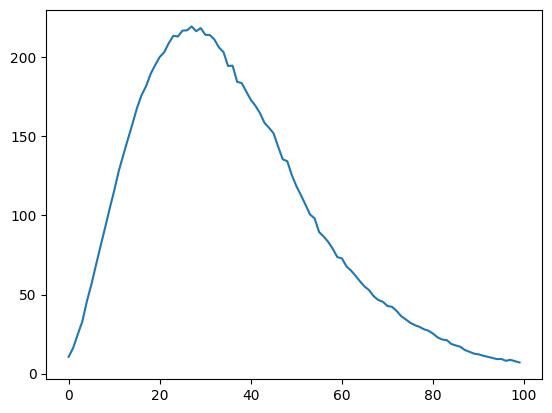

In [ ]:
plt.plot(range(t), mean_change)

In the above plot, black cells shows influenced and white shows non-influenced.

We assume that only the influenced people can influence their neighbours. We take the moore neighbourhood here

In [ ]:
global AMBIENT, HOT, COLD
AMBIENT = 25.0
HOT = 50.0
COLD = 0.0

In [ ]:
def initBar(m, n, hotSites, coldSites):
#   global AMBIENT
    ambientBar = AMBIENT * np.ones((m, n))
    bar = applyHotCold(ambientBar, hotSites, coldSites)
    return bar

In [ ]:
def applyHotCold(bar, hotSites, coldSites):
    for k in range(len(hotSites)):
        bar[hotSites[k, 0], hotSites[k, 1]] = HOT
    for k in range(len(coldSites)):
        bar[coldSites[k, 0], coldSites[k, 1]] = COLD
    return bar